In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('Project_dataset.csv',header=None)

In [2]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
0,0,-12,-17,-22,-19,-16,-16,-16,-17,-16,...,-22,-22,-17,-25,-32,-28,-30,-30,-25,-19
1,0,-9,-14,-12,-17,-20,-17,-22,-17,-16,...,-30,-22,-25,-25,-27,-32,-33,-28,-22,-16
2,1,-9,-12,-17,-16,-16,-14,-16,-16,-17,...,-25,-30,-28,-24,-17,-22,-30,-32,-33,-28
3,-1,-12,-17,-16,-14,-17,-16,-17,-19,-16,...,-20,-24,-20,-20,-24,-28,-30,-32,-33,-25
4,0,-8,-11,-11,-12,-16,-17,-17,-12,-12,...,-20,-24,-25,-22,-27,-27,-25,-22,-20,-14


In [3]:
#rename the column
df.columns=pd.Index(['col_'+str(i+1) for i in range(df.shape[1])])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Columns: 209 entries, col_1 to col_209
dtypes: int64(209)
memory usage: 901.4 KB


In [4]:
#check if there is any NaN value
df.isnull().any().describe()

count       209
unique        1
top       False
freq        209
dtype: object

In [5]:
# check if there is a column contains only the same value
check_uni=df.describe().loc['std']==0
check_uni.sum()

0

In [6]:
#  PCA
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [7]:
# make pipe
pipe=Pipeline([('scaler',StandardScaler()),
              ('pca',PCA(n_components=8))])

In [8]:
# fit th model
pc=pipe.fit_transform(df)

In [9]:
#check explained ratio
pipe.steps[1][1].explained_variance_ratio_.cumsum()


array([0.2072084 , 0.34215023, 0.42551623, 0.47729643, 0.51164904,
       0.54039985, 0.56436091, 0.58496066])

In [10]:
# check how many PCs should we have
elbow_df=pd.DataFrame(pipe.steps[1][1].explained_variance_ratio_,columns=['PC_explained_ratio'])

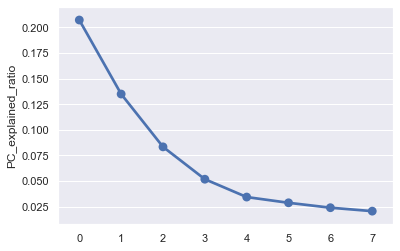

In [11]:
sns.pointplot(x=elbow_df.index,markers='o',y='PC_explained_ratio',data=elbow_df)
plt.show()

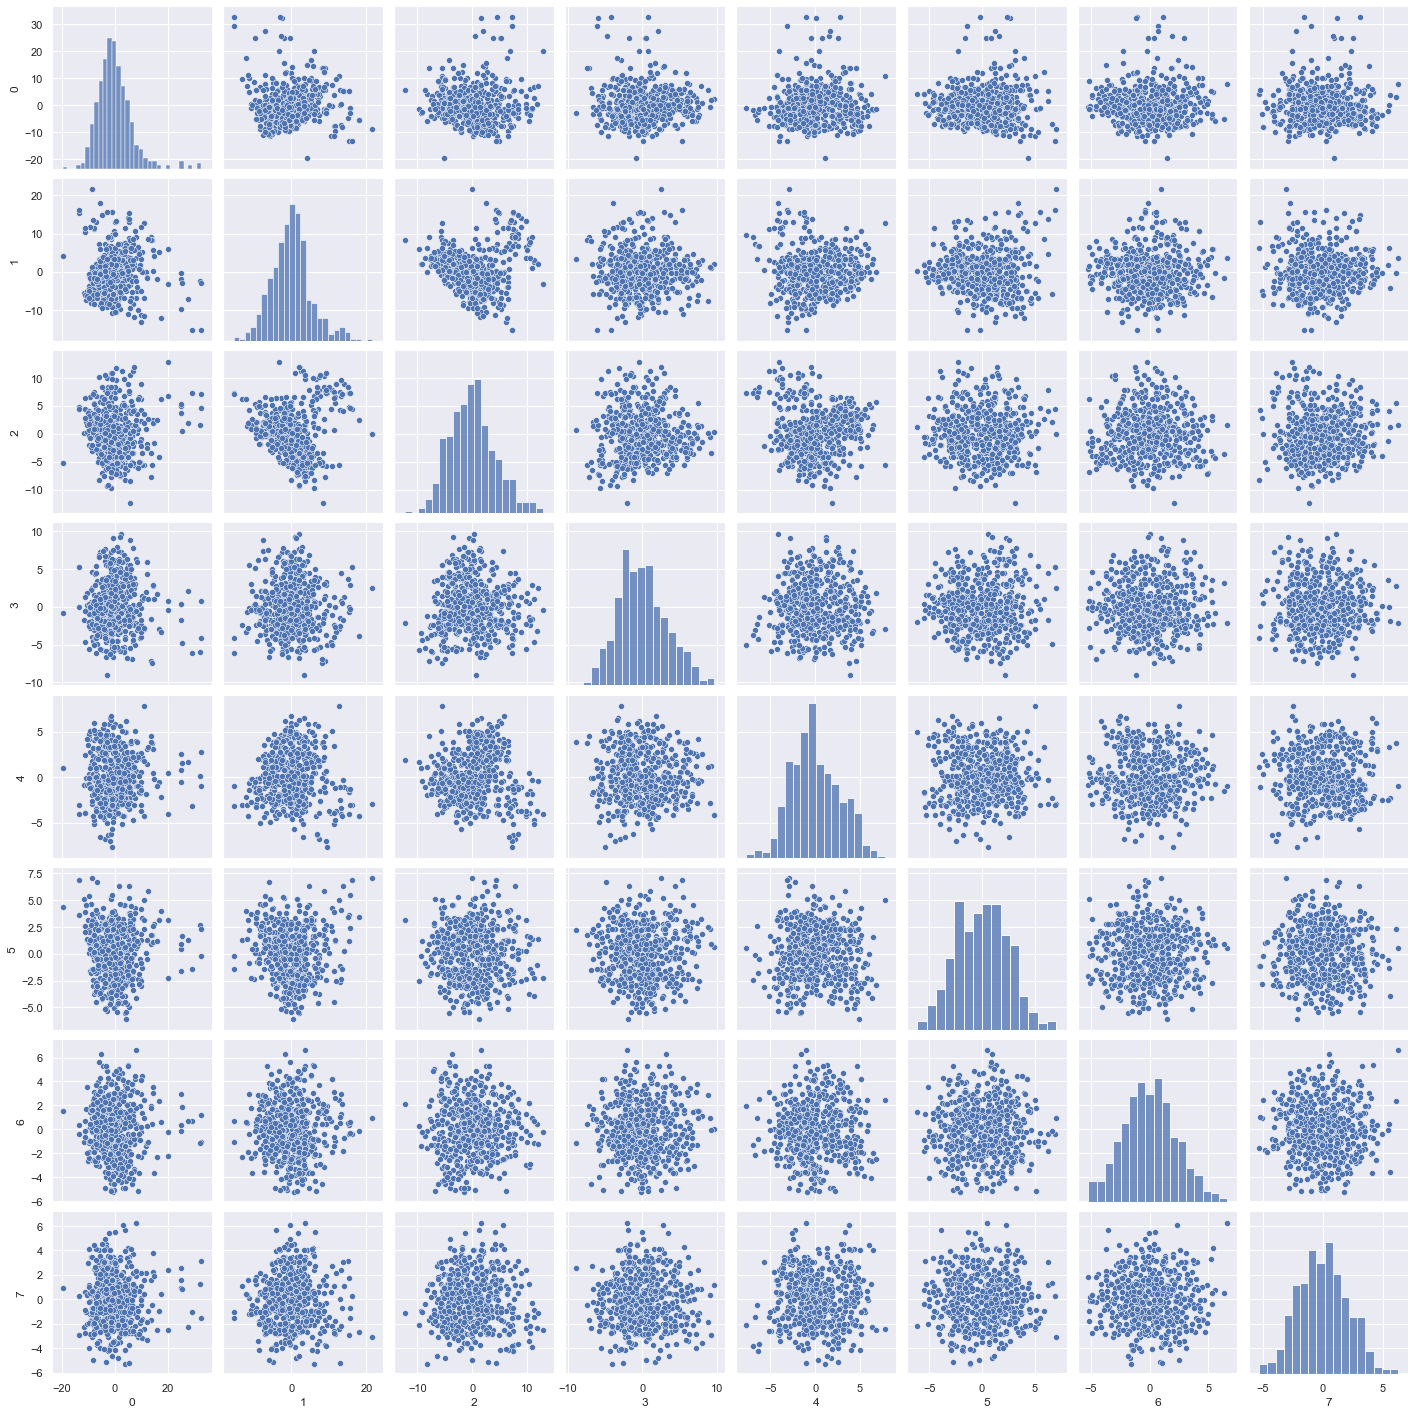

In [16]:
#pariplot of PCs
pc_df=pd.DataFrame(pc)
sns.pairplot(pc_df,diag_kind='hist')
plt.show()
fig.savefig('pairplot.png')

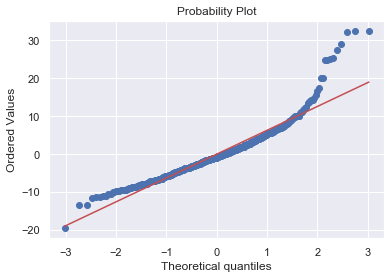

In [143]:
res = probplot(pc_df.loc[:,0], plot=plt)

In [131]:
# Clustering
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.manifold import TSNE
pipe=Pipeline([('scaler',StandardScaler()),
              ('pca',PCA(n_components=8)),
              ('clf',KMeans(n_clusters=4,random_state = 42,))
               #('clf',MeanShift(bandwidth=2))
              ])
pipe.fit(df)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=8,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=4, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [132]:
label=pipe.fit_predict(df)

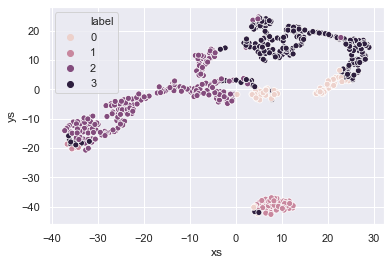

In [133]:
model=TSNE(learning_rate=100)
transformed=model.fit_transform(pc_df)
pc_df['xs']=transformed[:,0]
pc_df['ys']=transformed[:,1]
pc_df['label']=label
sns.scatterplot(x='xs',y='ys',data=pc_df,hue='label')

In [135]:
mask=pc_df['label']==3
inscale_df=df[mask]
inscale_df.shape
print('{} points were removed'.format(df.shape[0]-inscale_df.shape[0]))

341 points were removed


In [136]:
# make pipe
pipe=Pipeline([('scaler',StandardScaler()),
              ('pca',PCA(n_components=8))])

In [137]:
inscale_pc=pipe.fit_transform(inscale_df)
pipe.steps[1][1].explained_variance_ratio_.cumsum()

array([0.15541117, 0.2504717 , 0.32358904, 0.37371974, 0.41682576,
       0.45345169, 0.48502336, 0.51367905])

In [138]:
inscale_pc_df=pd.DataFrame(inscale_pc)

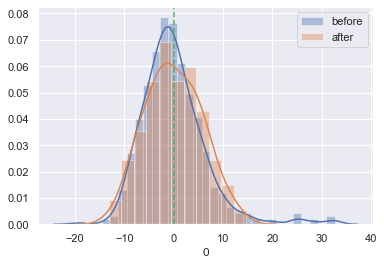

In [139]:
fig,ax=plt.subplots()
sns.distplot(pc_df.loc[:,0],ax=ax,label='before')
ax=sns.distplot(inscale_pc_df.loc[:,0],label='after')
ax.axvline(x=0,c='g',linestyle='--')
plt.legend()
plt.show()

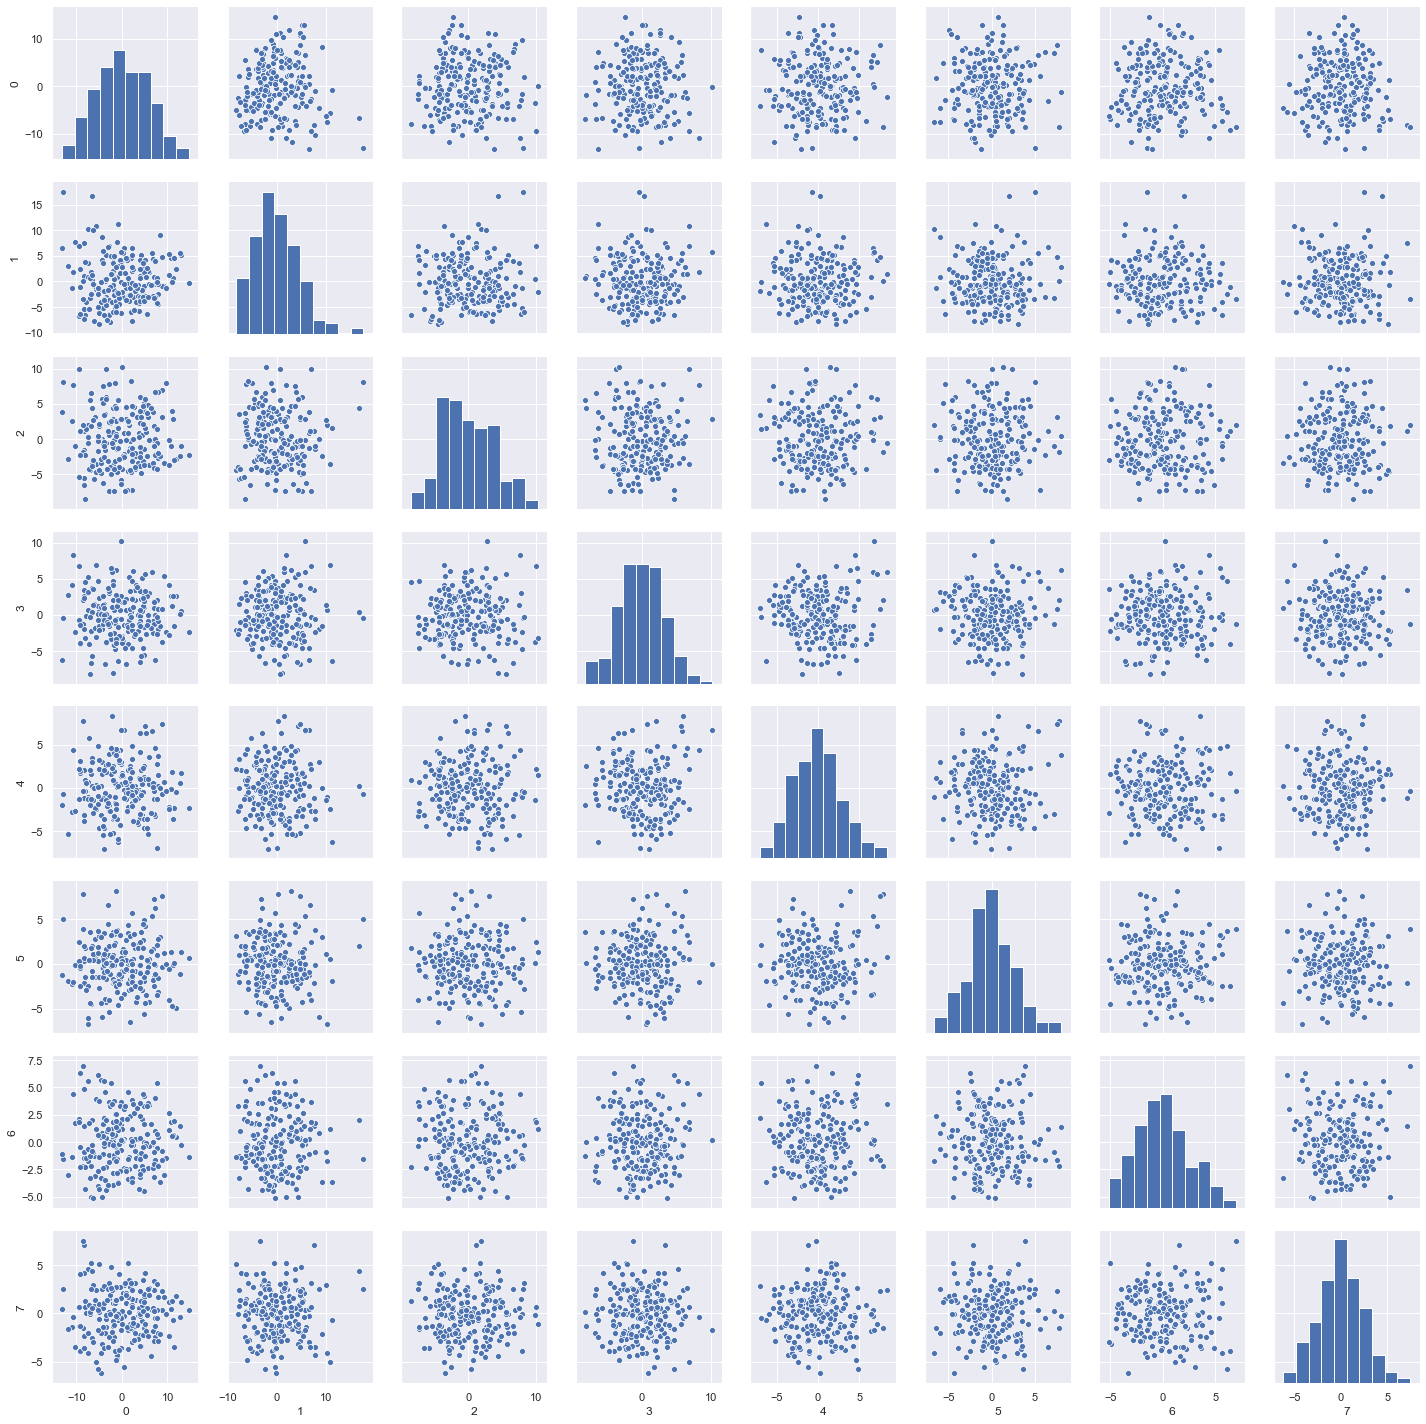

In [140]:
sns.pairplot(inscale_pc_df,diag_kind='hist')

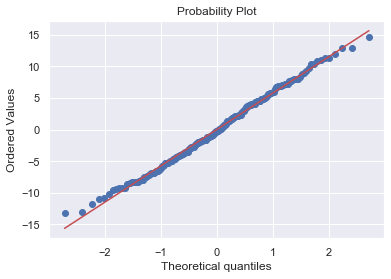

In [142]:
from scipy.stats import probplot
res = probplot(inscale_pc_df.loc[:,0], plot=plt)